In [33]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets,linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, recall_score, r2_score
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [8]:
data_frame = pd.read_csv("kc_house_data.csv")
data_frame.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data_frame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
data_frame.drop('id',axis=1,inplace=True)

In [12]:
data_frame.dropna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [26]:
data_frame.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
data_frame['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


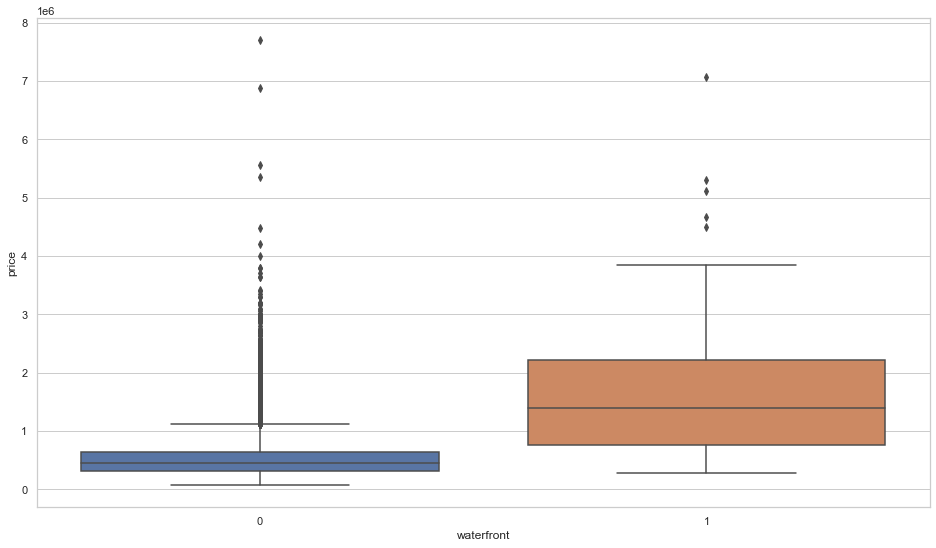

In [24]:
import seaborn as sns

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="waterfront", y="price", data=data_frame)

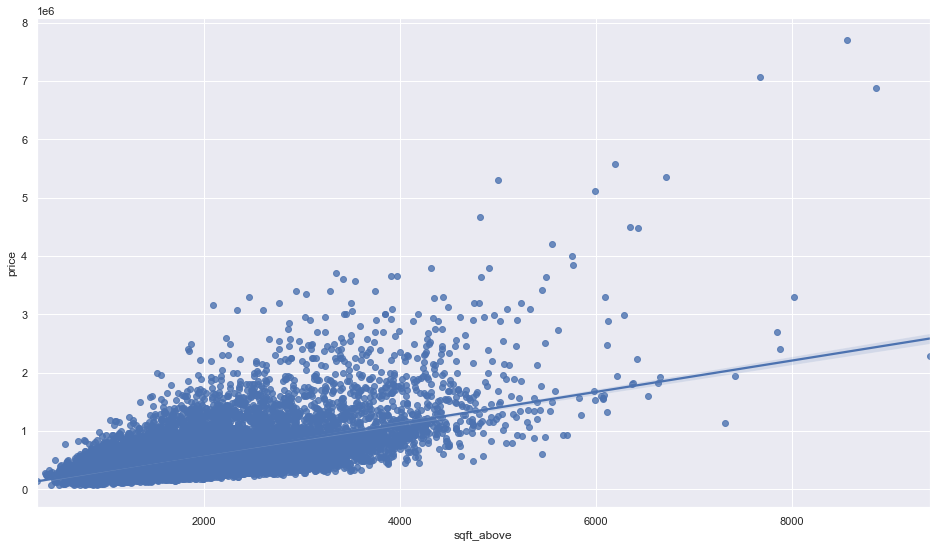

In [25]:
import seaborn as sns; sns.set_theme(color_codes=True)

ax = sns.regplot(x="sqft_above", y="price", data=data_frame)

In [27]:
X = data_frame[['sqft_living']]
y = data_frame['price']

In [28]:
#Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

In [29]:
# Verificamos los shape
print("Shape of X", X.shape,"Shape of y", y.shape)

Shape of X (21613, 1) Shape of y (21613,)


In [30]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [31]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [34]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.51
Mean squared error: 67873194998.88
Coeficiente de determinación: 0.51


In [61]:
X = data_frame[['sqft_living','floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade']]
y = data_frame['price']

In [62]:
#Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

In [63]:
# Verificamos los shape
print("Shape of X", X.shape,"Shape of y", y.shape)

Shape of X (21613, 11) Shape of y (21613,)


In [64]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [65]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [66]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.68
Mean squared error: 43948877723.75
Coeficiente de determinación: 0.68


In [67]:
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [68]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [69]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.68
Mean squared error: 43948877723.75
Coeficiente de determinación: 0.68


In [70]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 29)

In [71]:
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [72]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [73]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.67
Mean squared error: 44482059195.24
Coeficiente de determinación: 0.67


In [74]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [75]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[1.0000e+00, 1.1800e+03, 1.0000e+00, ..., 1.3924e+06, 8.2600e+03,
        4.9000e+01],
       [1.0000e+00, 2.5700e+03, 2.0000e+00, ..., 4.7089e+06, 1.5190e+04,
        4.9000e+01],
       [1.0000e+00, 7.7000e+02, 1.0000e+00, ..., 5.9290e+05, 4.6200e+03,
        3.6000e+01],
       ...,
       [1.0000e+00, 1.0200e+03, 2.0000e+00, ..., 1.0404e+06, 7.1400e+03,
        4.9000e+01],
       [1.0000e+00, 1.6000e+03, 2.0000e+00, ..., 2.5600e+06, 1.2800e+04,
        6.4000e+01],
       [1.0000e+00, 1.0200e+03, 2.0000e+00, ..., 1.0404e+06, 7.1400e+03,
        4.9000e+01]])

In [76]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 29)

In [77]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [78]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.67
Mean squared error: 44482059195.24
Coeficiente de determinación: 0.67
